In [42]:
# imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [23]:
# Cargar los datos

data = pd.read_csv('../data/HR-Employee-Attrition.csv')

In [24]:
# Eliminar variables irrelevantes
data.drop(columns=["EmployeeCount", "StandardHours", "EmployeeNumber", "Over18"], inplace=True)


In [25]:
#Features & Target

X = data.drop(columns=['Attrition'])  # Features
y = data['Attrition'].map({"Yes": 1, "No": 0})  # Target

In [ ]:
# Encoding categorical variables

cat_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le 

In [31]:
# Create train and test (validation) samples

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (1176, 30), X_test: (294, 30), y_train: (1176,), y_test: (294,)


In [34]:
# Create and train the model

model = SGDClassifier(loss = 'log_loss') # Logistic regression
hyperparameters = model.get_params()
model.fit(X_train, y_train)

SGDClassifier(loss='log_loss')

In [35]:
y_pred = model.predict(X_test)

print('Model:', model, '\n')
print('Model hyperparameters:', hyperparameters, '\n')
print('Ground truth target:', y_test, '\n')
print('Predicted target:', y_pred, '\n')

Model: SGDClassifier(loss='log_loss') 

Model hyperparameters: {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log_loss', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False} 

Ground truth target: 1041    0
184     0
1222    1
67      0
220     0
       ..
567     0
560     0
945     0
522     0
651     0
Name: Attrition, Length: 294, dtype: int64 

Predicted target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [48]:
# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred)
rmse

0.1326530612244898

In [47]:
# Visual analysis

check = pd.DataFrame({'Ground truth':y_test[:10],
                      'Predictions':y_pred[:10], 
                      'RMSE':rmse})
check

,Ground truth,Predictions,RMSE
1041,0,0,0.132653
184,0,0,0.132653
1222,1,0,0.132653
67,0,0,0.132653
220,0,0,0.132653
494,0,0,0.132653
430,0,0,0.132653
240,0,0,0.132653
218,0,0,0.132653
49,0,0,0.132653


In [50]:
#Modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

C:\Users\bdelavega1\AppData\Local\anaconda3\envs\sklearn-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
txt = f"""
Accuracy: {accuracy:.4f}
Precision: {precision:.4f}
Recall: {recall:.4f}
F1 Score: {f1:.4f}
ROC AUC Score: {roc_auc:.4f}
"""
print(txt)


Accuracy: 0.8673
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC Score: 0.5000



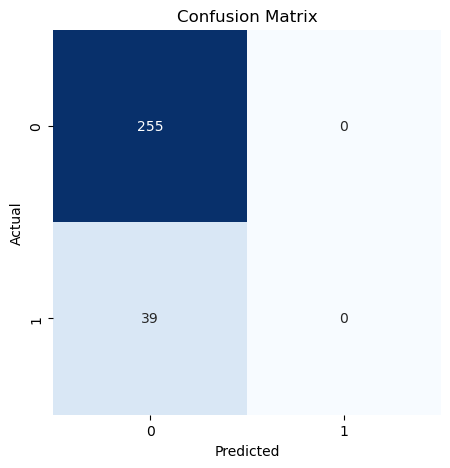

In [52]:
# Mtriz de confusión
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()


In [53]:
'''
Metricas:
El modelo tiene buena precisión global (86.73%), pero esto es engañoso porque solo predice la clase mayoritaria (0).
Precision, recall y F1 Score son 0, indicando que el modelo nunca detectó un caso positivo.
ROC AUC Score de 0.5, lo que sugiere que el modelo no tiene mejor rendimiento que una clasificación aleatoria.
Conclusion:
El modelo está sesgado hacia la clase mayoritaria y no predice ningún caso de atrición (1).
Las métricas muestran un falso buen rendimiento (accuracy alto pero recall y precision nulos).
'''

'\nEl modelo está sesgado hacia la clase mayoritaria y no predice ningún caso de atrición (1).\nLas métricas muestran un falso buen rendimiento (accuracy alto pero recall y precision nulos).\n'